<a href="https://colab.research.google.com/github/KRISHTHUKRAL679/python-lab-KRISH-THUKRAL/blob/main/assignment1krish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder


Saving Online Sales Data.csv to Online Sales Data (1).csv


In [ ]:
df = pd.read_csv("Online Sales Data.csv")
df.head()



,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
print("Shape:", df.shape)
df.info()
df.describe(include="all")


Shape: (240, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
count,240.00000,240,240,240,240.000000,240.000000,240.000000,240,240
unique,NaN,240,6,232,NaN,NaN,NaN,3,3
top,NaN,2024-01-01,Electronics,Dyson Supersonic Hair Dryer,NaN,NaN,NaN,North America,Credit Card
freq,NaN,1,40,2,NaN,NaN,NaN,80,120
mean,10120.50000,NaN,NaN,NaN,2.158333,236.395583,335.699375,NaN,NaN
std,69.42622,NaN,NaN,NaN,1.322454,429.446695,485.804469,NaN,NaN
min,10001.00000,NaN,NaN,NaN,1.000000,6.500000,6.500000,NaN,NaN
25%,10060.75000,NaN,NaN,NaN,1.000000,29.500000,62.965000,NaN,NaN
50%,10120.50000,NaN,NaN,NaN,2.000000,89.990000,179.970000,NaN,NaN
75%,10180.25000,NaN,NaN,NaN,3.000000,249.990000,399.225000,NaN,NaN


- Order ID: Unique identifier for each sales order (Categorical/ID)
- Date: Date of the sales transaction (Datetime)
- Category: Broad category of product sold (Categorical)
- Product Name: Specific product name/model (Categorical)
- Quantity: Number of units sold (Numerical)
- Unit Price: Price of a single unit (Numerical)
- Total Price: Revenue from the transaction (Numerical)
- Region: Geographic region of transaction (Categorical)
- Payment Method: Mode of payment (Categorical)



Duplicates: 0
Missing values per column:
 Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


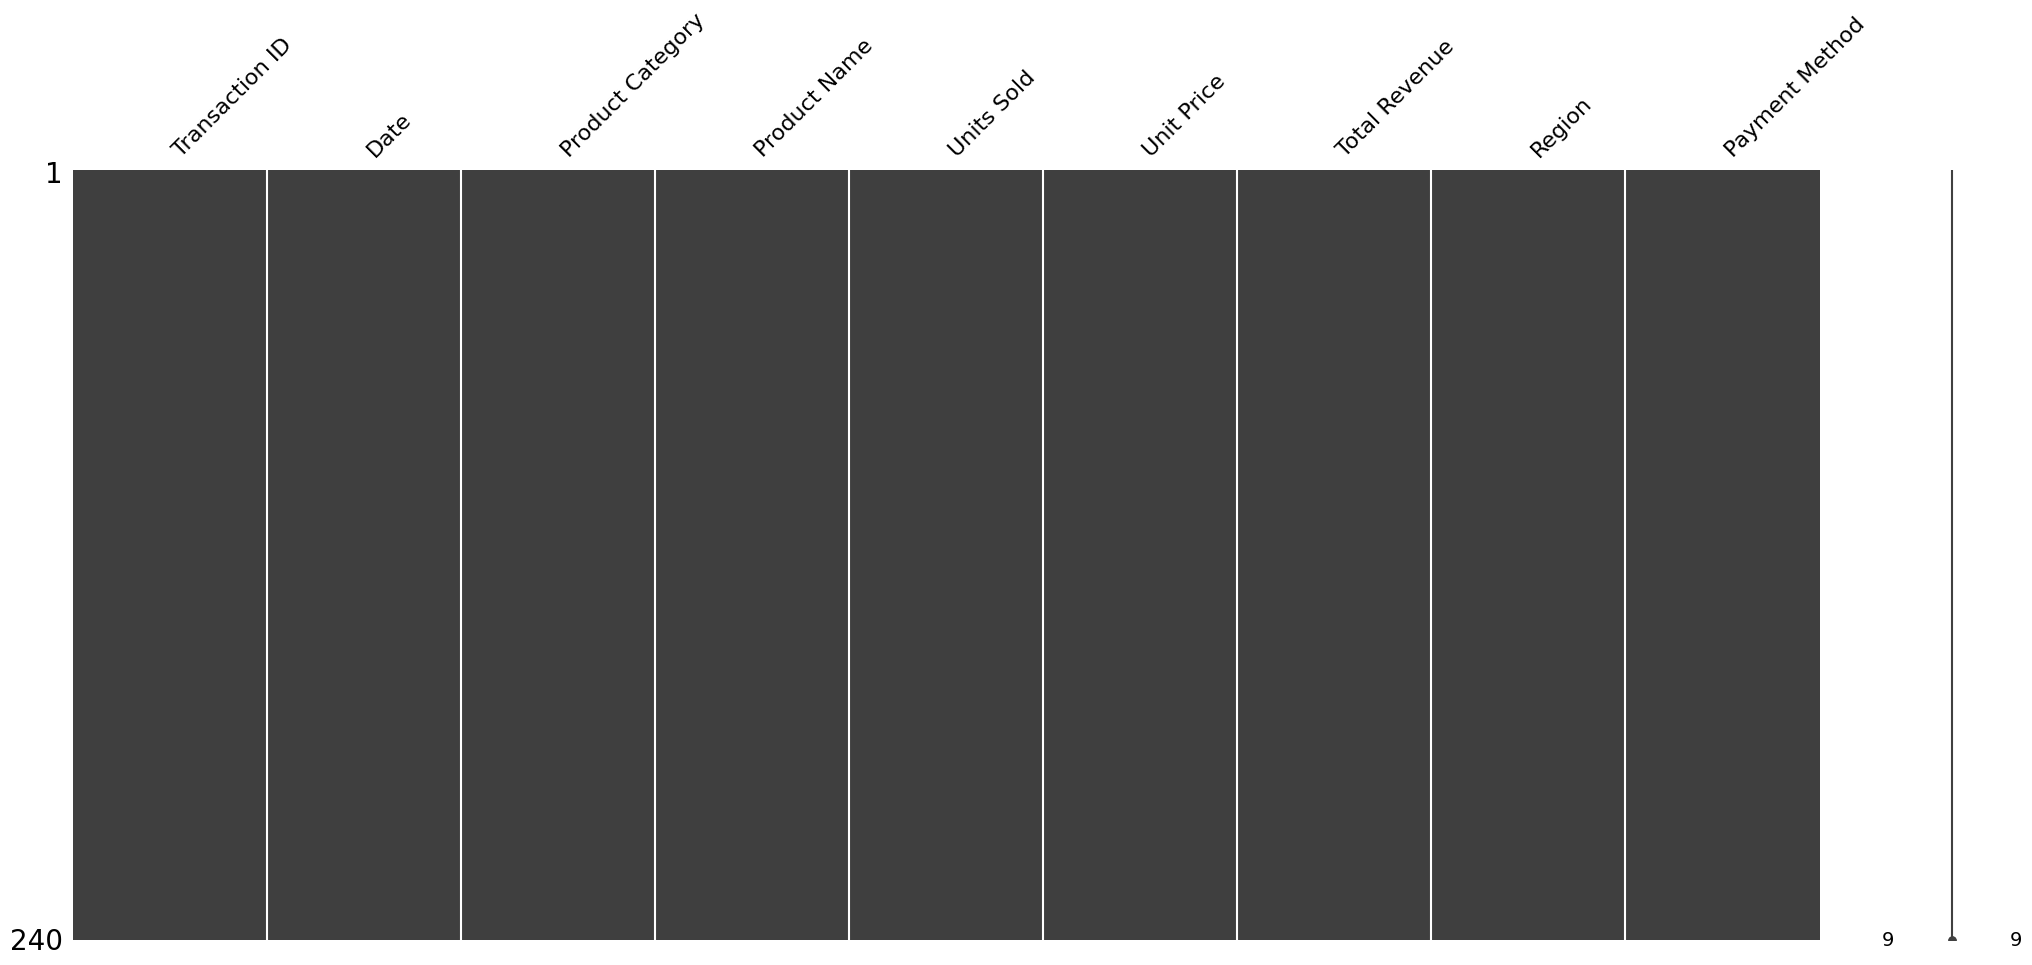

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


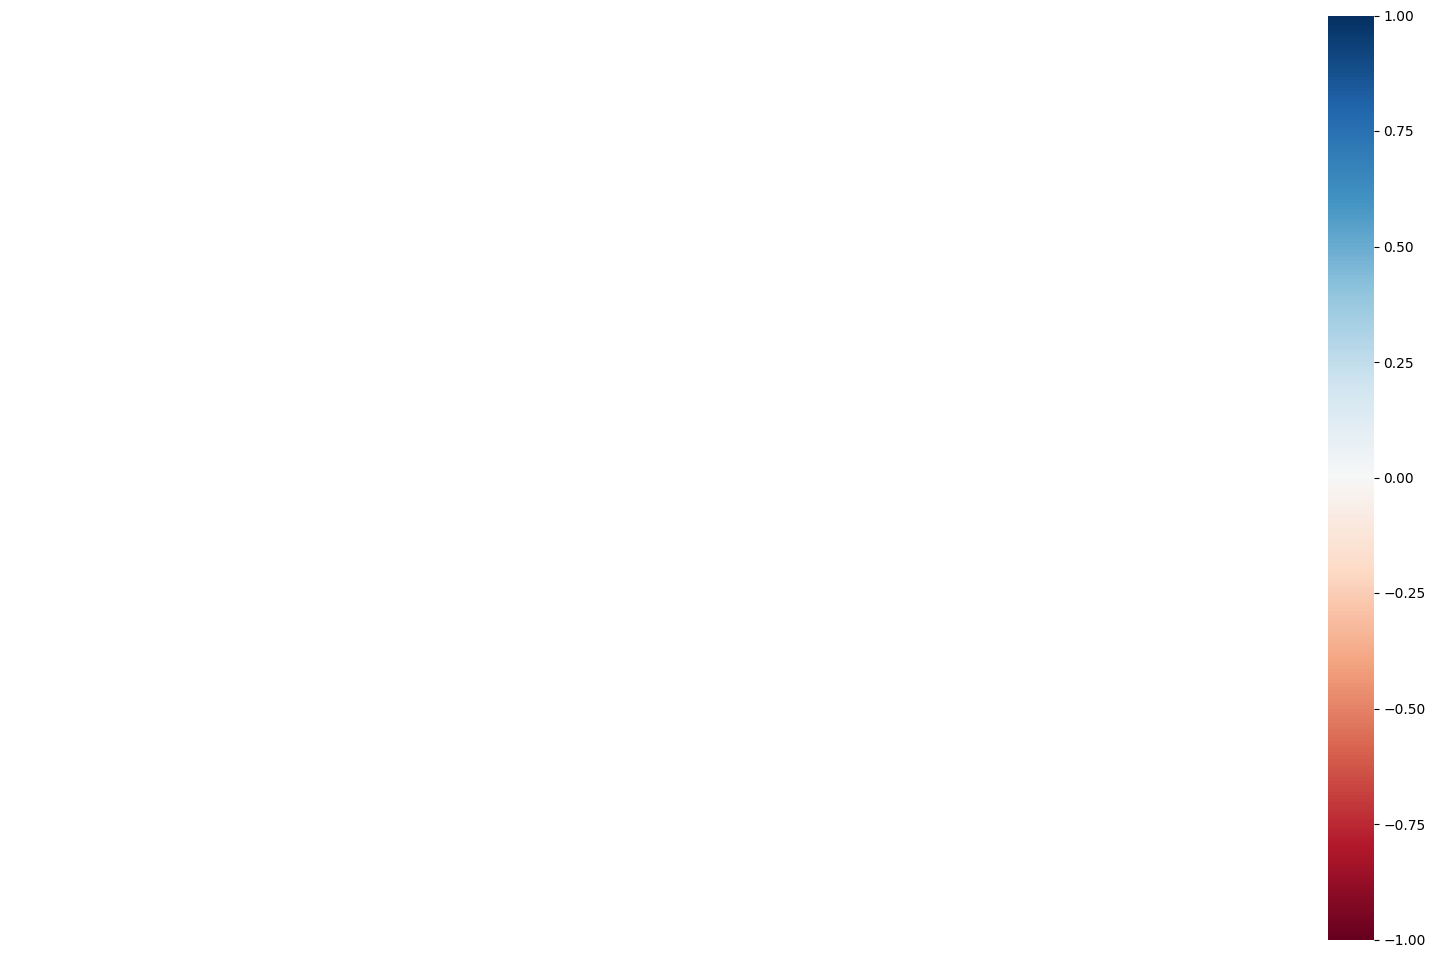

In [ ]:
print("Duplicates:", df.duplicated().sum())
print("Missing values per column:\n", df.isnull().sum())

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()


In [ ]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

for col in ['Product Category', 'Product Name', 'Region', 'Payment Method']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

for col in ['Units Sold', 'Unit Price', 'Total Revenue']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


In [ ]:

scaler = StandardScaler()
num_cols = ['Units Sold', 'Unit Price', 'Total Revenue']
df[num_cols] = scaler.fit_transform(df[num_cols])

le = LabelEncoder()
for col in ['Product Category', 'Product Name', 'Region', 'Payment Method']:
    df[col] = le.fit_transform(df[col])

df['AvgPrice'] = df['Total Revenue'] / (df['Units Sold'] + 1e-5)


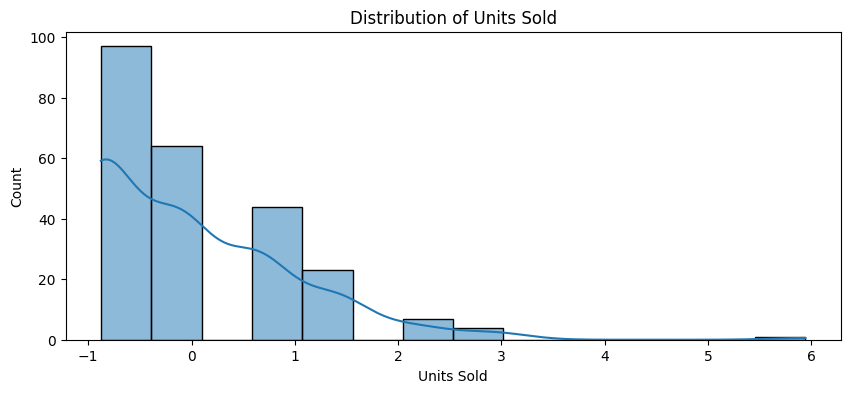

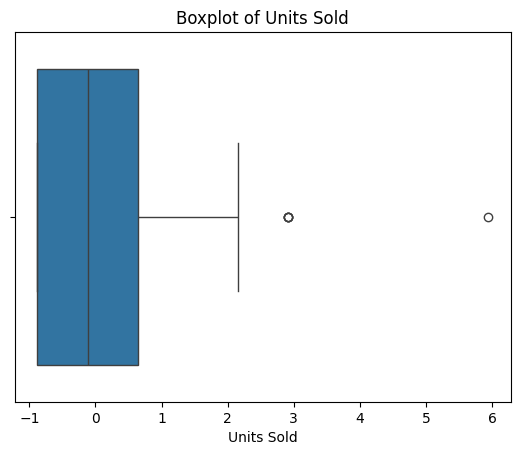

Units Sold Skewness: 1.6208946896061183 Kurtosis: 4.77569895572106


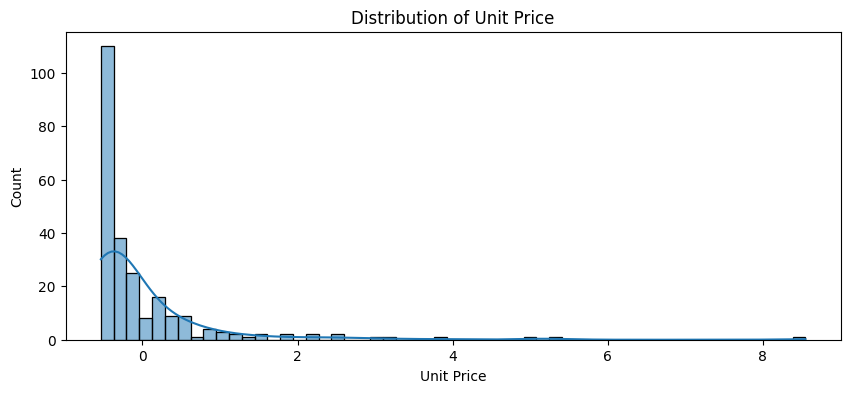

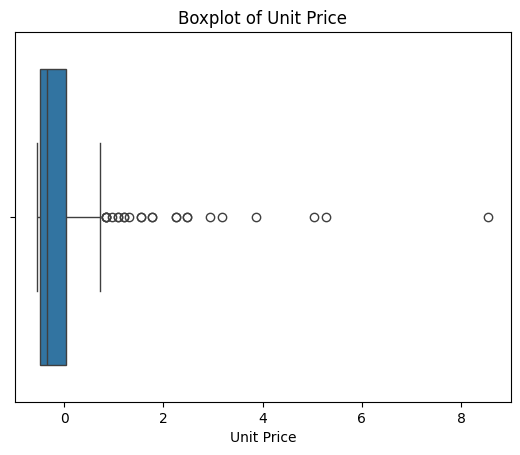

Unit Price Skewness: 4.566664299804367 Kurtosis: 28.234405217426794


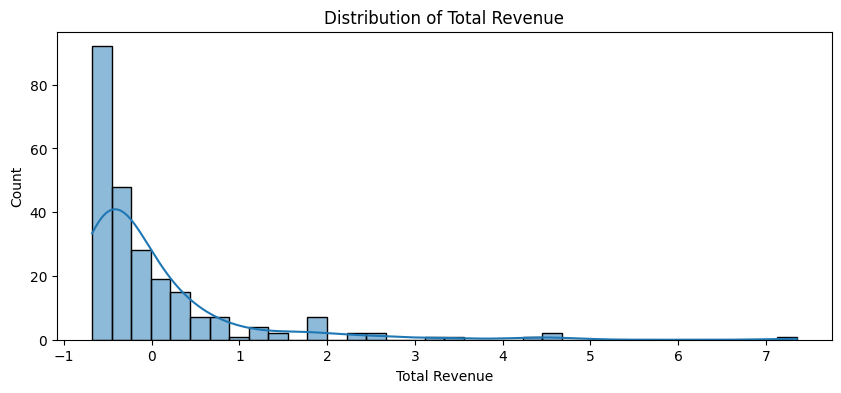

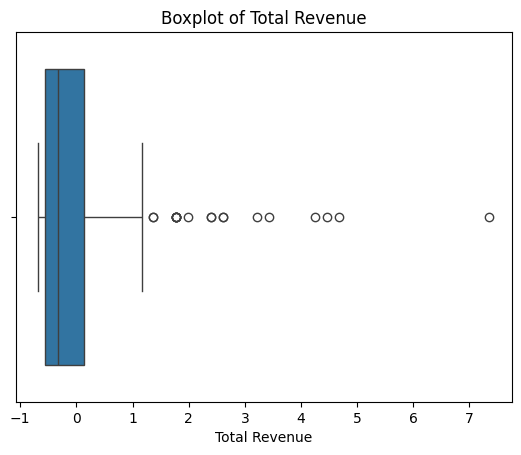

Total Revenue Skewness: 3.5231827900607287 Kurtosis: 16.68191785306885


In [ ]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    print(col, "Skewness:", df[col].skew(), "Kurtosis:", df[col].kurt())


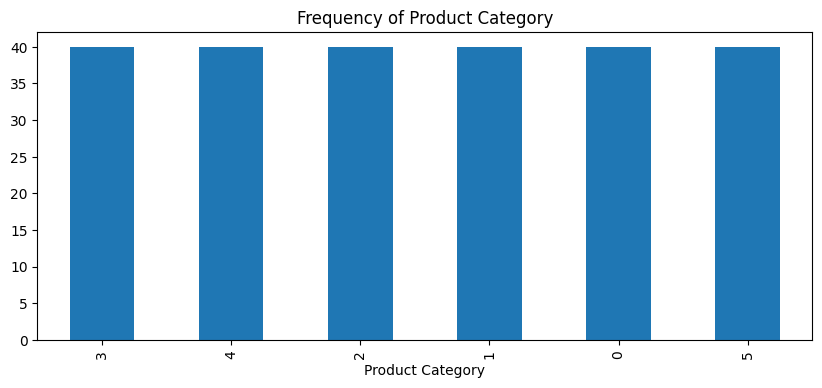

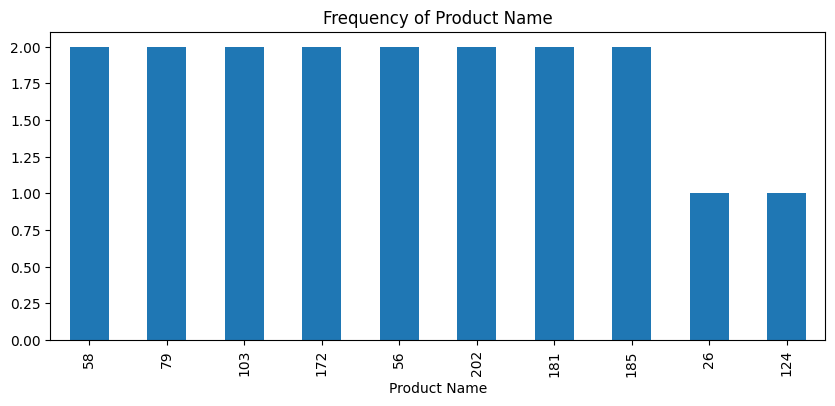

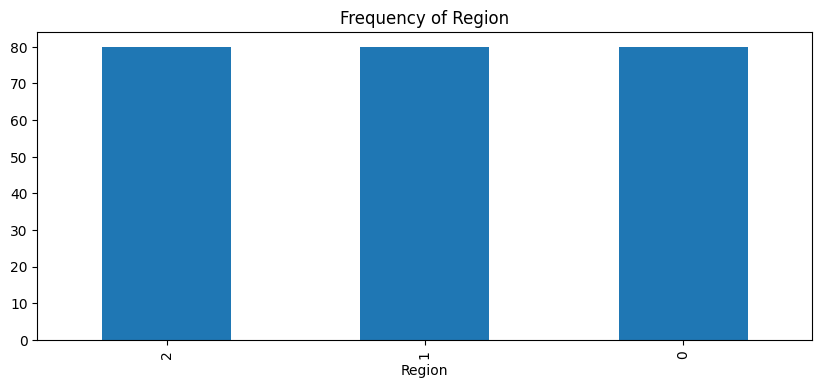

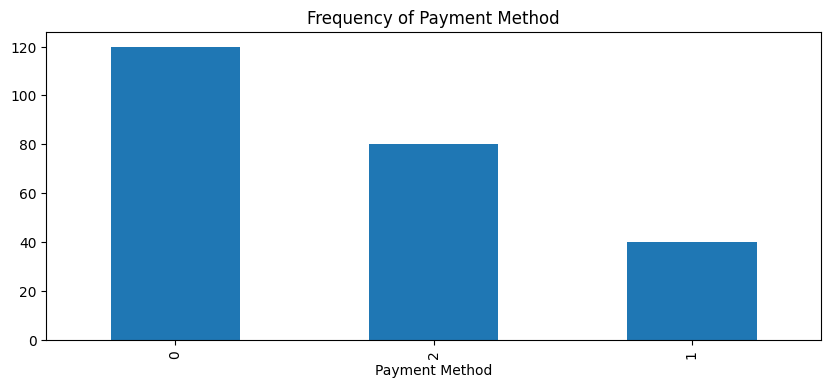

In [ ]:
cat_cols = ['Product Category', 'Product Name', 'Region', 'Payment Method']
for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')  # Top 10 for readability
    plt.title(f"Frequency of {col}")
    plt.show()


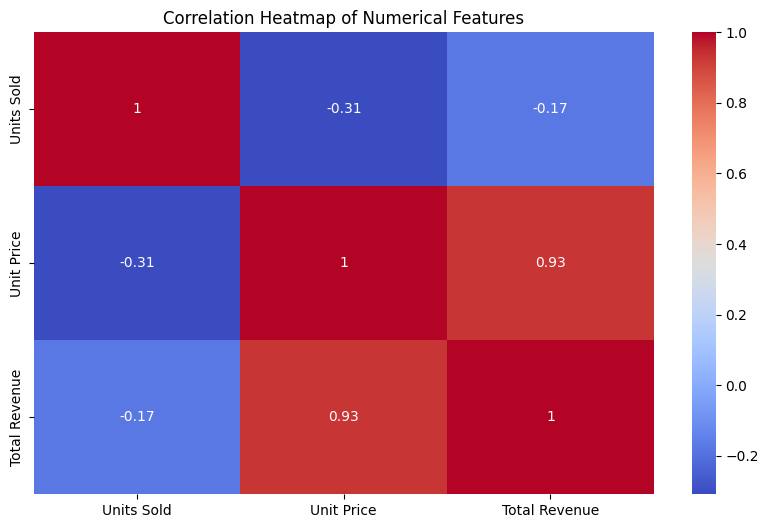

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


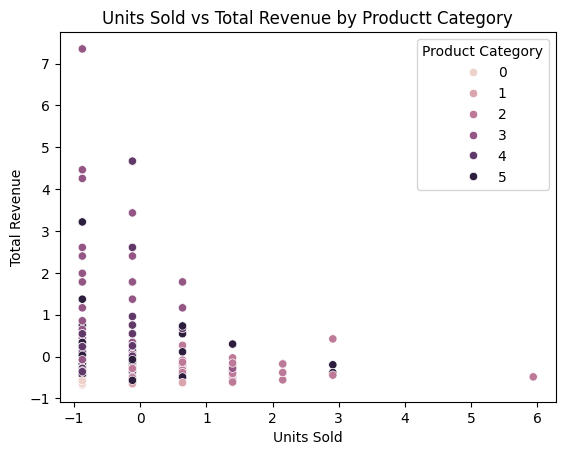

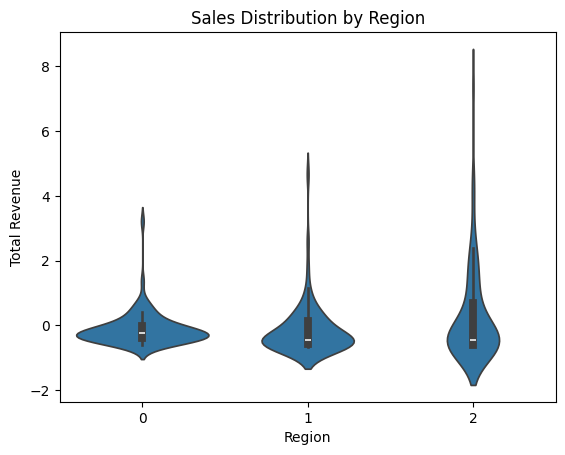

In [ ]:
sns.scatterplot(x='Units Sold', y='Total Revenue', hue='Product Category', data=df)
plt.title("Units Sold vs Total Revenue by Productt Category")
plt.show()

sns.violinplot(x='Region', y='Total Revenue', data=df)
plt.title("Sales Distribution by Region")
plt.show()


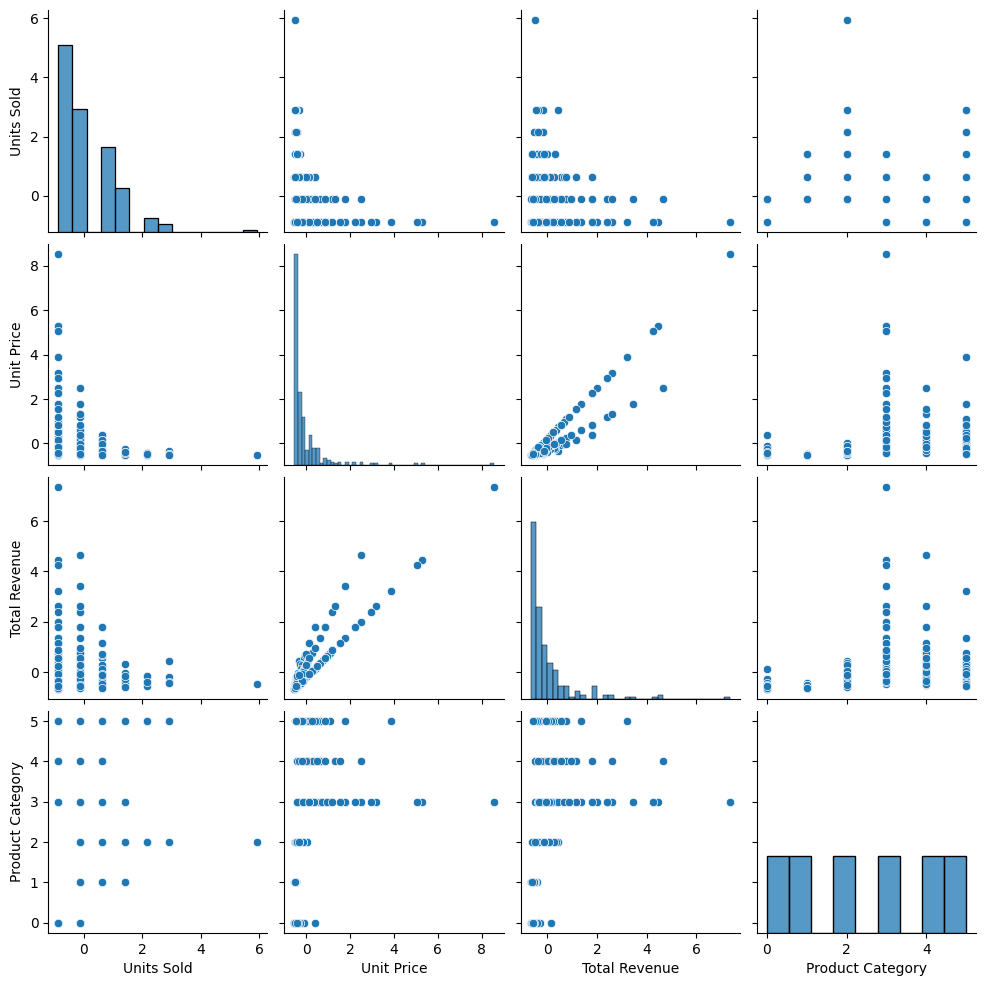

In [ ]:
sns.pairplot(df[['Units Sold', 'Unit Price', 'Total Revenue', 'Product Category']])
plt.show()


Units Sold Outliers: 5


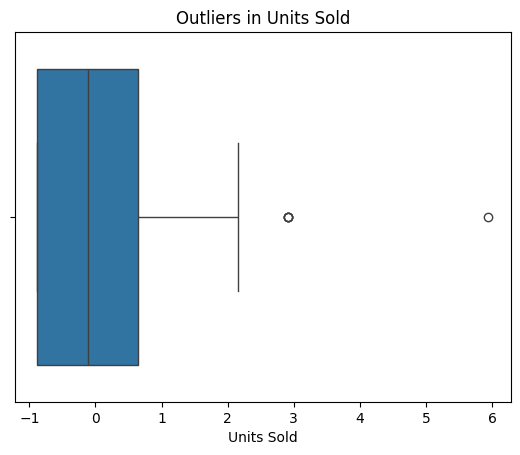

Unit Price Outliers: 24


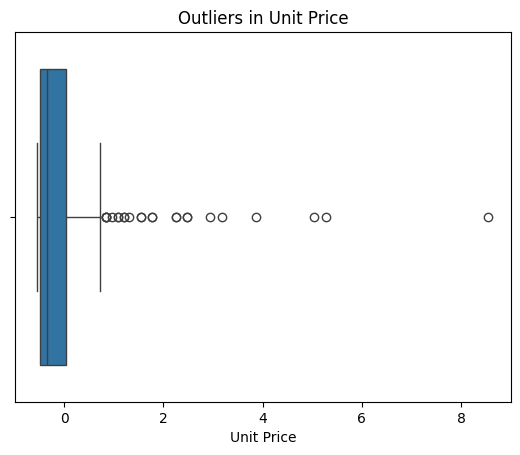

Total Revenue Outliers: 19


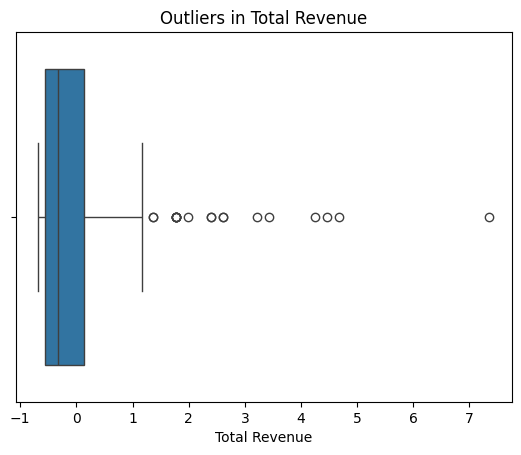

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(col, "Outliers:", outliers.shape[0])
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


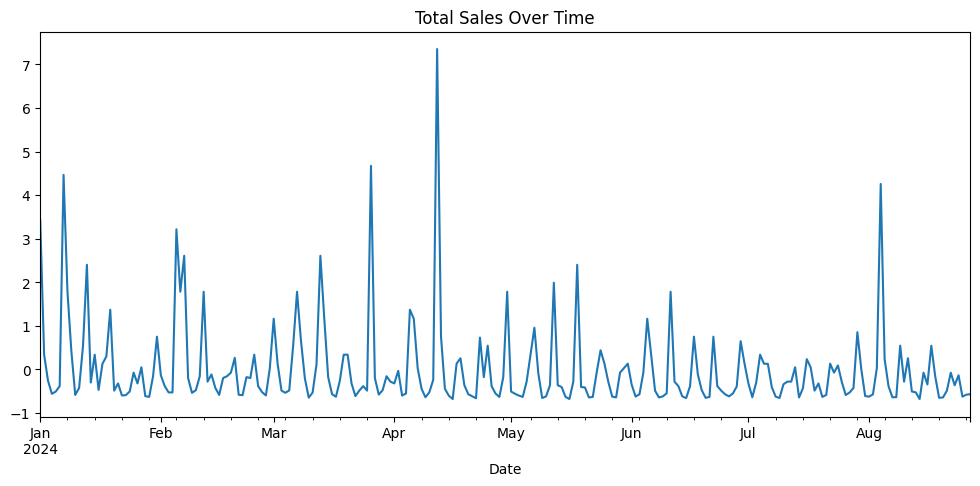

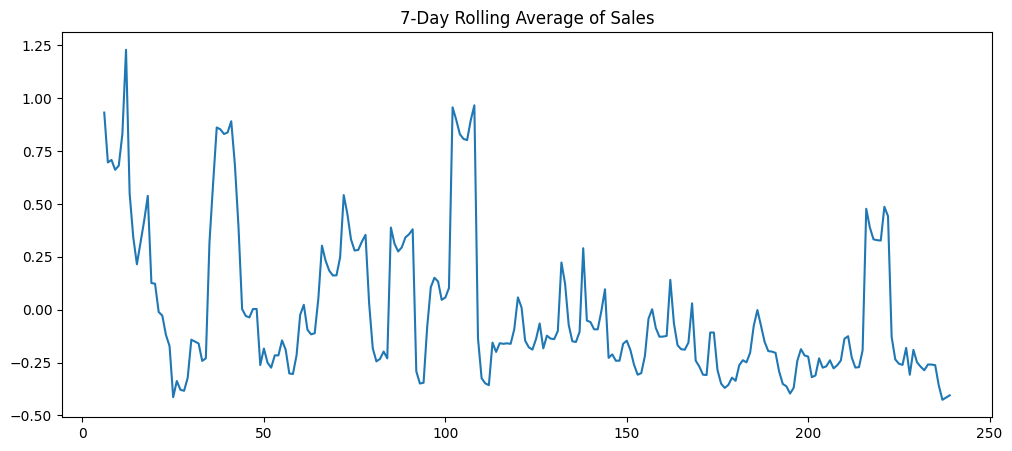

In [ ]:
df.set_index('Date')['Total Revenue'].plot(figsize=(12,5))
plt.title("Total Sales Over Time")
plt.show()

df['Total Revenue'].rolling(7).mean().plot(figsize=(12,5))
plt.title("7-Day Rolling Average of Sales")
plt.show()


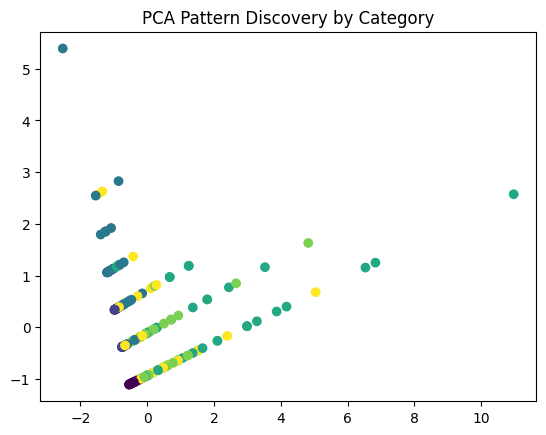

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(df[num_cols])
plt.scatter(pcs[:,0], pcs[:,1], c=df['Product Category'], cmap='viridis')
plt.title("PCA Pattern Discovery by Category")
plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter(df, x='Units Sold', y='Total Revenue', color='Region',
                 hover_data=['Product Category', 'Payment Method'])
fig.show()


1)Top 3 Insights Discovered

Strong correlation between Unit Price and Total Revenue (correlation ≈ 0.93) → higher-priced products directly drive revenue regardless of quantity sold.

Units Sold distribution is highly skewed → most transactions involve small quantities (1–3 units), with only a few large purchases.

Regional and Payment Method patterns → North America dominates sales, and Credit Card is the most frequent payment method, showing customer preference trends.

 2)Impact of Handling Missing Values

The dataset had no missing values or duplicates (as confirmed by isnull().sum()), so imputation or dropping wasn’t required.

This ensured that insights (correlations, distributions, and outlier detection) are accurate and unbiased without artificial adjustments.

 3)Use for Decision-Making / Prediction

Revenue Prediction: Strong link between unit_price and total_revenue means predictive models can focus on price-driven features.

Inventory Planning: Since most orders are small, businesses can stock accordingly and reserve special handling for rare bulk orders.

Market Strategy: Insights on preferred regions and payment methods can guide targeted promotions and tailored checkout/payment options.